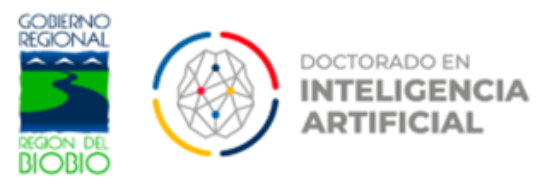
#LUMINA: Un Modelo de IA para Clasificación de Perfiles Docentes en Retroalimentación.

Nombre: Sheny San Martín Quiroga

Asignatura: Inteligencia Artificial

Profesor: Francisco Saavedra

##Conjunto de Datos:

El instrumento de recolección de datos fue un cuestionario estructurado elaborado en un formulario de Google, compuesto por 36 preguntas, organizadas en cuatro dimensiones:

Dimensión 1: Datos sociodemográficos

Dimensión 2: Conocimiento sobre retroalimentación

Dimensión 3: Prácticas de retroalimentación

Dimensión 4: Percepción de la institucionalidad

El cuestionario combinó ítems de tipo cerrado, con escala ordinal tipo Likert, y preguntas de selección múltiple para captar tanto la frecuencia como la intensidad de las prácticas docentes.


#**Preprocesamiento de los datos**

Se renombran las columnas (preguntas) a formato variable.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

# Cargar datos
df = pd.read_excel('/content/drive/MyDrive/Respuestas_Cuestionario_Retroalimentación.xlsx')

# Renombrar columnas a formato variable
column_mapping = {
    'Marca temporal': 'marca_temporal',
    'Acepto participar:': 'acepto_participar',
    '1. Género': '1_genero',
    '2. Edad': '2_edad',
    '3. Nombre de su comunidad educativa': '3_nombre_comunidad_educativa',
    '4. RBD del establecimiento al que pertenece': '4_rbd_establecimiento',
    '5. Tipo de establecimiento': '5_tipo_establecimiento',
    '6. Tramo en el que se encuentra en la Carrera Docente': '6_tramo_carrera_docente',
    '7. Región donde trabaja': '7_region_trabajo',
    '8. Nivel(es) educativos que imparte (puede marcar más de una opción)': '8_niveles_educativos',
    '9. Modalidad de educación que imparte su establecimiento': '9_modalidad_educacion',
    '10. Asignatura principal que imparte (en la que tiene más horas pedagógicas)': '10_asignatura_principal',
    '11. Años de experiencia docente': '11_años_experiencia_docente',
    '12. Cantidad de horas pedagógicas semanales': '12_horas_pedagogicas_semanales',
    '13. Número promedio de estudiantes por curso': '13_promedio_estudiantes_curso',
    '14. Carrera de origen: Pedagogía u otra': '14_carrera_origen',
    '15. ¿En su labor pedagógica, considera usted que realiza retroalimentación?': '15_realiza_retroalimentacion',
    '16. ¿Cuál es su nivel de formación en retroalimentación para el aula?': '16_nivel_formacion_retroalimentacion',
    '17. ¿Cuál de las siguientes opciones resume de mejor manera el concepto de retroalimentación? (puede marcar más de una opción)': '17_concepto_retroalimentacion',
    '18. ¿Qué relevancia le otorga a la retroalimentación en el proceso de enseñanza- aprendizaje?': '18_relevancia_retroalimentacion',
    '19. ¿En qué momento (s) entrega retroalimentación a sus estudiantes? (puede marcar más de una opción)': '19_momento_entrega_retroalimentacion',
    '20. ¿Qué técnica (s) de retroalimentación utiliza? (puede marcar más de una opción)': '20_tecnicas_retroalimentacion',
    '21. ¿Cuánto tiempo por clase dedica a entregar retroalimentación?': '21_tiempo_retroalimentacion_clase',
    '22. ¿Debe ser la retroalimentación vista como un evento aislado o como un componente integral y continuo del aprendizaje?': '22_retroalimentacion_evento_continuo',
    '23. Cuando proporciona retroalimentación, ¿Qué enfoque (s) utiliza? (puede marcar más de una opción)': '23_enfoques_retroalimentacion',
    '24. ¿Considera que la retroalimentación que entrega incide en sus propias prácticas pedagógicas y en la planificación de sus clases?': '24_incidencia_retroalimentacion_practicas',
    '25. ¿Con qué frecuencia utiliza tecnologías para retroalimentar a sus estudiantes?': '25_frecuencia_tecnologias_retroalimentacion',
    '26. ¿Qué herramientas tecnológicas utiliza para retroalimentar a sus estudiantes? (puede marcar más de una opción)': '26_herramientas_tecnologicas',
    '27. Si lo estima conveniente, comente las ventajas de utilizar tecnologías para retroalimentar al estudiante (respuesta abierta)': '27_ventajas_tecnologias_retroalimentacion',
    '28. Si lo estima conveniente, comente las dificultades encontradas al usar tecnologías para retroalimentar al estudiante': '28_dificultades_tecnologias_retroalimentacion',
    '29. ¿Considera que colocar en práctica la retroalimentación genera un impacto positivo en el aprendizaje de sus estudiantes?': '29_impacto_positivo_retroalimentacion',
    '30. ¿Considera que su comunidad educativa fomenta una cultura de retroalimentación en el aula?': '30_comunidad_educativa_fomenta_retroalimentacion',
    '31. ¿Considera que la retroalimentación en el aula está integrada en su comunidad educativa de manera formal?': '31_retroalimentacion_integrada_formal',
    '32. ¿Con qué frecuencia observa mejoras en el aprendizaje de sus estudiantes tras retroalimentar?': '32_frecuencia_mejoras_aprendizaje',
    '33. ¿En su comunidad educativa tiene acceso a capacitaciones en retroalimentación de aprendizajes en el aula?': '33_acceso_capacitaciones_retroalimentacion',
    '34. ¿Cómo evalúa el apoyo (por ejemplo: pedagógico, herramientas tecnológicas, capacitación) que recibe de su institución educativa para retroalimentar a sus estudiantes?': '34_evaluacion_apoyo_institucion',
    '35. ¿En su comunidad educativa, con que frecuencia le solicitan entregar reportes acerca de la retroalimentación que usted hace con sus estudiantes?': '35_frecuencia_reportes_retroalimentacion',
    '36. ¿Cuáles son los principales desafíos que enfrenta al implementar una retroalimentación efectiva en su aula? (puede marcar más de una opción)': '36_desafios_retroalimentacion_efectiva',
}

# Crea una lista de los nuevos nombres de columna aplicando el mapeo
# Si un nombre original de columna no está en el mapeo, se mantiene su nombre original.
new_columns = [column_mapping.get(col, col) for col in df.columns]
df.columns = new_columns

# Eliminar filas donde 'acepto_participar' es 'No'
df = df[df['acepto_participar'] != 'No']

# Mostrar información básica
print("\nINSPECCIÓN INICIAL DEL CONJUNTO DE DATOS:")
print("\nColumnas (primeras 10):", df.columns.tolist()[:10]) # Muestra las primeras 10 para verificar
print("\nINFORMACIÓN DEL DATAFRAME:")
print(df.info())
print("\nDESCRIPCIÓN ESTADÍSTICA:")
print(df.describe())
print("\nVALORES NULOS ORDENADOS:")
valores_nulos = df.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]
valores_nulos_ordenados = valores_nulos.sort_values(ascending=False)
print(valores_nulos_ordenados)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

INSPECCIÓN INICIAL DEL CONJUNTO DE DATOS:

Columnas (primeras 10): ['marca_temporal', 'acepto_participar', '1_genero', '2_edad', '3_nombre_comunidad_educativa', '4_rbd_establecimiento', '5_tipo_establecimiento', '6_tramo_carrera_docente', '7_region_trabajo', '8_niveles_educativos']

INFORMACIÓN DEL DATAFRAME:
<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   marca_temporal                                    250 non-null    datetime64[ns]
 1   acepto_participar                                 250 non-null    object        
 2   1_genero                                          250 non-null    object        
 3   2_edad                  

## Identificar Columnas Categóricas Ordinales


In [2]:
# Lista de columnas categóricas ordinales
ordinal_cols_for_inspection = [
    '16_nivel_formacion_retroalimentacion',
    '18_relevancia_retroalimentacion',
    '21_tiempo_retroalimentacion_clase',
    '22_retroalimentacion_evento_continuo',
    '24_incidencia_retroalimentacion_practicas',
    '25_frecuencia_tecnologias_retroalimentacion',
    '29_impacto_positivo_retroalimentacion',
    '30_comunidad_educativa_fomenta_retroalimentacion',
    '31_retroalimentacion_integrada_formal',
    '32_frecuencia_mejoras_aprendizaje'
    '33_acceso_capacitaciones_retroalimentacion',
    '34_evaluacion_apoyo_institucion',
    '35_frecuencia_reportes_retroalimentacion'
]

# Examina los valores únicos para las columnas ordinales
ordinal_scales = {}
for col in ordinal_cols_for_inspection:
    if col in df.columns:
        ordinal_scales[col] = df[col].unique()

for col, scale in ordinal_scales.items():
    print(f"Column: {col}")
    print(f"Scale: {scale}\n")

Column: 16_nivel_formacion_retroalimentacion
Scale: ['He recibido formación especializada (diplomado, posgrado)'
 'He aprendido de forma autódidacta o informal'
 'He participado en talleres o cursos breves'
 'Lo conozco, pero no he recibido formación' 'No conozco el concepto']

Column: 18_relevancia_retroalimentacion
Scale: ['Muy relevante' 'Medianamente relevante' 'Extremadamente relevante'
 'Poco relevante' 'Nada relevante']

Column: 21_tiempo_retroalimentacion_clase
Scale: ['15 - 30 min' 'Menos de 15 min' '30 min - 1 h' '1 - 2 h']

Column: 22_retroalimentacion_evento_continuo
Scale: ['Un componente integral y continuo durante todo el proceso de aprendizaje'
 'Principalmente al final del semestre/trimestre, con algunas instancias intermedias'
 'No lo tengo claro']

Column: 24_incidencia_retroalimentacion_practicas
Scale: ['Siempre, me ayuda a ajustar y mejorar mi enseñanza'
 'Frecuentemente, pero no siempre de forma explícita'
 'A veces, si los resultados son muy evidentes' 'No lo te

## Definir Mapeos

Para cada columna ordinal identificada, se define un mapeo de las respuestas de texto a valores numéricos.


In [3]:
ordinal_mappings = {
    '16_nivel_formacion_retroalimentacion': {
        'No conozco el concepto': 0,
        'Lo conozco, pero no he recibido formación': 1,
        'He aprendido de forma autódidacta o informal': 2,
        'He participado en talleres o cursos breves': 3,
        'He recibido formación especializada (diplomado, posgrado)': 4,
    },
    '18_relevancia_retroalimentacion': {
        'Nada relevante': 0,
        'Poco relevante': 1,
        'Medianamente relevante': 2,
        'Muy relevante': 3,
        'Extremadamente relevante': 4,
    },
    '21_tiempo_retroalimentacion_clase': {
        'Menos de 15 min': 0,
        '15 - 30 min': 1,
        '30 min - 1 h': 2,
        '1 - 2 h': 3,
        '+ 2 h': 4,
    },
    '22_retroalimentacion_evento_continuo': {
        'Un evento aislado al finalizar una tarea':2,
        'Un componente integral y continuo durante todo el proceso de aprendizaje': 4,
        'Principalmente al final del semestre/trimestre, con algunas instancias intermedias': 3,
        'Solo cuando se solicita específicamente':1,
        'No lo tengo claro': 0,
    },
    '24_incidencia_retroalimentacion_practicas': {
        'No lo tengo claro': 0,
        'Raramente, me enfoco más en el aprendizaje del estudiante': 1,
        'A veces, si los resultados son muy evidentes': 2,
        'Frecuentemente, pero no siempre de forma explícita': 3,
        'Siempre, me ayuda a ajustar y mejorar mi enseñanza': 4,
    },
    '25_frecuencia_tecnologias_retroalimentacion': {
        'Nunca': 0,
        'Rara vez': 1,
        'A veces': 2,
        'Frecuentemente': 3,
        'Siempre': 4,
    },
    '29_impacto_positivo_retroalimentacion': {
        'Muy en desacuerdo': 0,
        'En desacuerdo': 1,
        'Ni de acuerdo ni en desacuerdo': 2,
        'De acuerdo': 3,
        'Muy de acuerdo': 4,
    },
    '32_frecuencia_mejoras_aprendizaje': {
        'Nunca hago retroalimentación': 0,
        'Nunca': 0,
        'Rara vez': 1,
        'A veces': 2,
        'Frecuentemente': 3,
        'Siempre': 4,
    }
}

##Aplicar Mapeos

In [4]:
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"Column '{col}' has been mapped.")

Column '16_nivel_formacion_retroalimentacion' has been mapped.
Column '18_relevancia_retroalimentacion' has been mapped.
Column '21_tiempo_retroalimentacion_clase' has been mapped.
Column '22_retroalimentacion_evento_continuo' has been mapped.
Column '24_incidencia_retroalimentacion_practicas' has been mapped.
Column '25_frecuencia_tecnologias_retroalimentacion' has been mapped.
Column '29_impacto_positivo_retroalimentacion' has been mapped.
Column '32_frecuencia_mejoras_aprendizaje' has been mapped.


##Verificar Conversión

In [5]:
mapped_columns = list(ordinal_mappings.keys())
display(df[mapped_columns].head())

print("\nTipos de datos de las columnas asignadas:")
print(df[mapped_columns].dtypes)

,16_nivel_formacion_retroalimentacion,18_relevancia_retroalimentacion,21_tiempo_retroalimentacion_clase,22_retroalimentacion_evento_continuo,24_incidencia_retroalimentacion_practicas,25_frecuencia_tecnologias_retroalimentacion,29_impacto_positivo_retroalimentacion,32_frecuencia_mejoras_aprendizaje
0,4,3,1,4,4,1,4,3
1,2,2,1,4,3,1,3,3
2,2,3,1,4,3,3,4,3
3,4,4,0,4,3,0,3,2
4,2,1,1,4,2,1,3,3



Tipos de datos de las columnas asignadas:
16_nivel_formacion_retroalimentacion           int64
18_relevancia_retroalimentacion                int64
21_tiempo_retroalimentacion_clase              int64
22_retroalimentacion_evento_continuo           int64
24_incidencia_retroalimentacion_practicas      int64
25_frecuencia_tecnologias_retroalimentacion    int64
29_impacto_positivo_retroalimentacion          int64
32_frecuencia_mejoras_aprendizaje              int64
dtype: object


##Identificar Columnas de Selección Múltiple

In [6]:
multiselect_cols = [
    '17_concepto_retroalimentacion',
    '19_momento_entrega_retroalimentacion',
    '20_tecnicas_retroalimentacion',
    '23_enfoques_retroalimentacion',
    '26_herramientas_tecnologicas'
]

print("Columnas de selección múltiple identificadas:")
print(multiselect_cols)

Columnas de selección múltiple identificadas:
['17_concepto_retroalimentacion', '19_momento_entrega_retroalimentacion', '20_tecnicas_retroalimentacion', '23_enfoques_retroalimentacion', '26_herramientas_tecnologicas']


##Verificar valores no nulos

In [7]:
import pandas as pd

# Forzar a pandas a mostrar TODAS las columnas y filas
pd.set_option('display.max_columns', None)   # Muestra todas las columnas
pd.set_option('display.max_rows', None)      # Muestra todas las filas (cuidado si son miles)
pd.set_option('display.width', None)         # Evita el salto de línea
pd.set_option('display.expand_frame_repr', False)  # No envuelve la tabla

print("\n--- Cantidad de respuestas no nulas por pregunta (todas las columnas) ---")
display(df.count().to_frame(name='Número de Respuestas'))



--- Cantidad de respuestas no nulas por pregunta (todas las columnas) ---


,Número de Respuestas
marca_temporal,250
acepto_participar,250
1_genero,250
2_edad,250
3_nombre_comunidad_educativa,250
4_rbd_establecimiento,250
5_tipo_establecimiento,250
6_tramo_carrera_docente,250
7_region_trabajo,250
8_niveles_educativos,250


## Convertir los valores de las variables de selección múltiple a valores numéricos en el dataframe.

Contar las opciones seleccionadas: Para cada fila y cada columna de selección múltiple, contar el número de opciones seleccionadas en la respuesta.

In [8]:
multiselect_counts = {}
for col in multiselect_cols:
    if col in df.columns:
       multiselect_counts[col] = df[col].apply(lambda x: len(str(x).strip().split(',')) if str(x).strip() and str(x).strip() != 'nan' else 0)

for col, counts in multiselect_counts.items():
    print(f"Counts for column '{col}':")
    display(counts.head())

Counts for column '17_concepto_retroalimentacion':


,17_concepto_retroalimentacion
0,2
1,1
2,1
3,1
4,1


Counts for column '19_momento_entrega_retroalimentacion':


,19_momento_entrega_retroalimentacion
0,1
1,1
2,1
3,6
4,1


Counts for column '20_tecnicas_retroalimentacion':


,20_tecnicas_retroalimentacion
0,3
1,2
2,2
3,2
4,3


Counts for column '23_enfoques_retroalimentacion':


,23_enfoques_retroalimentacion
0,2
1,8
2,2
3,6
4,4


Counts for column '26_herramientas_tecnologicas':


,26_herramientas_tecnologicas
0,3
1,3
2,4
3,1
4,1


## Crear nueva columna con el conteo
Crear una nueva columna en el DataFrame para cada pregunta de selección múltiple que contenga el conteo de opciones seleccionadas.


In [9]:
for col, counts in multiselect_counts.items():
    df[f'{col}_count'] = counts

# Display the head of the DataFrame with the new count columns
display(df[[f'{col}_count' for col in multiselect_cols]].head())

,17_concepto_retroalimentacion_count,19_momento_entrega_retroalimentacion_count,20_tecnicas_retroalimentacion_count,23_enfoques_retroalimentacion_count,26_herramientas_tecnologicas_count
0,2,1,3,2,3
1,1,1,2,8,3
2,1,1,2,2,4
3,1,6,2,6,1
4,1,1,3,4,1


## Verificar el conteo

In [10]:
cols_to_display = multiselect_cols + [f'{col}_count' for col in multiselect_cols]
display(df[cols_to_display].head())

,17_concepto_retroalimentacion,19_momento_entrega_retroalimentacion,20_tecnicas_retroalimentacion,23_enfoques_retroalimentacion,26_herramientas_tecnologicas,17_concepto_retroalimentacion_count,19_momento_entrega_retroalimentacion_count,20_tecnicas_retroalimentacion_count,23_enfoques_retroalimentacion_count,26_herramientas_tecnologicas_count
0,"Hacer correcciones puntuales, Preguntas de met...",Clase a clase,"Retroalimentación oral individual, Uso de rúbr...","Centrada en el proceso (por ejemplo, los pasos...","Formularios, Correos electrónicos, Videos",2,1,3,2,3
1,Dar información para mejorar,Clase a clase,"Retroalimentación oral individual, Retroalimen...","Centrada en la tarea (por ejemplo, si el traba...","Audios, Videos, ChatGPT",1,1,2,8,3
2,Dar información para mejorar,Clase a clase,"Retroalimentación escrita, Retroalimentación o...","Centrada en el proceso (por ejemplo, los pasos...","Videos, Rúbricas digitales, Wordwall, geogebra...",1,1,2,2,4
3,Dar información para mejorar,"Clase a clase, Después de cada evaluación suma...","Retroalimentación escrita, Retroalimentación o...","Centrada en la tarea (por ejemplo, si el traba...",Ninguna,1,6,2,6,1
4,Hacer correcciones puntuales,Clase a clase,"Retroalimentación escrita, Retroalimentación o...","Centrada en el proceso (por ejemplo, los pasos...",Videos,1,1,3,4,1


## Manejar valores nulos



In [11]:
count_cols = [f'{col}_count' for col in multiselect_cols]
print("\nValores nulos en columnas de conteo antes de imputación:")
print(df[count_cols].isnull().sum())

# Reemplazar los valores nulos con 0 en las columnas de recuento
df[count_cols] = df[count_cols].fillna(0)
print("\nValores nulos en columnas de conteo después de imputación:")
print(df[count_cols].isnull().sum())

display(df[count_cols].head())


Valores nulos en columnas de conteo antes de imputación:
17_concepto_retroalimentacion_count           0
19_momento_entrega_retroalimentacion_count    0
20_tecnicas_retroalimentacion_count           0
23_enfoques_retroalimentacion_count           0
26_herramientas_tecnologicas_count            0
dtype: int64

Valores nulos en columnas de conteo después de imputación:
17_concepto_retroalimentacion_count           0
19_momento_entrega_retroalimentacion_count    0
20_tecnicas_retroalimentacion_count           0
23_enfoques_retroalimentacion_count           0
26_herramientas_tecnologicas_count            0
dtype: int64


,17_concepto_retroalimentacion_count,19_momento_entrega_retroalimentacion_count,20_tecnicas_retroalimentacion_count,23_enfoques_retroalimentacion_count,26_herramientas_tecnologicas_count
0,2,1,3,2,3
1,1,1,2,8,3
2,1,1,2,2,4
3,1,6,2,6,1
4,1,1,3,4,1


## Identificación de variables para visualizaciones

In [12]:
# Columnas numéricas
numerical_cols = ['2_edad', '4_rbd_establecimiento', '12_horas_pedagogicas_semanales']

# Columnas categóricas
categorical_cols = [
    '1_genero',
    '3_nombre_comunidad_educativa',
    '5_tipo_establecimiento',
    '6_tramo_carrera_docente',
    '7_region_trabajo',
    '8_niveles_educativos',
    '9_modalidad_educacion',
    '10_asignatura_principal',
    '11_años_experiencia_docente',
    '13_promedio_estudiantes_curso',
    '14_carrera_origen',
    '15_realiza_retroalimentacion'
]
# Columnas ordinales
ordinal_cols_mapped = [
    '16_nivel_formacion_retroalimentacion',
    '18_relevancia_retroalimentacion',
    '21_tiempo_retroalimentacion_clase',
    '22_retroalimentacion_evento_continuo',
    '24_incidencia_retroalimentacion_practicas',
    '25_frecuencia_tecnologias_retroalimentacion',
    '29_impacto_positivo_retroalimentacion',
    '30_comunidad_educativa_fomenta_retroalimentacion',
    '31_retroalimentacion_integrada_formal',
    '32_frecuencia_mejoras_aprendizaje',
    '33_acceso_capacitaciones_retroalimentacion',
    '34_evaluacion_apoyo_institucion',
    '35_frecuencia_reportes_retroalimentacion'
]

# Columnas de conteo de las preguntas de selección múltiple
count_cols = [
    '17_concepto_retroalimentacion_count',
    '19_momento_entrega_retroalimentacion_count',
    '20_tecnicas_retroalimentacion_count',
    '23_enfoques_retroalimentacion_count',
    '26_herramientas_tecnologicas_count'
]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Ordinal Columns (Mapped):", ordinal_cols_mapped)
print("Count Columns:", count_cols)

Numerical Columns: ['2_edad', '4_rbd_establecimiento', '12_horas_pedagogicas_semanales']
Categorical Columns: ['1_genero', '3_nombre_comunidad_educativa', '5_tipo_establecimiento', '6_tramo_carrera_docente', '7_region_trabajo', '8_niveles_educativos', '9_modalidad_educacion', '10_asignatura_principal', '11_años_experiencia_docente', '13_promedio_estudiantes_curso', '14_carrera_origen', '15_realiza_retroalimentacion']
Ordinal Columns (Mapped): ['16_nivel_formacion_retroalimentacion', '18_relevancia_retroalimentacion', '21_tiempo_retroalimentacion_clase', '22_retroalimentacion_evento_continuo', '24_incidencia_retroalimentacion_practicas', '25_frecuencia_tecnologias_retroalimentacion', '29_impacto_positivo_retroalimentacion', '30_comunidad_educativa_fomenta_retroalimentacion', '31_retroalimentacion_integrada_formal', '32_frecuencia_mejoras_aprendizaje', '33_acceso_capacitaciones_retroalimentacion', '34_evaluacion_apoyo_institucion', '35_frecuencia_reportes_retroalimentacion']
Count Column

## Visualizaciones univariadas




###Gráficos para visualizar la distribución de cada variable numérica individualmente.

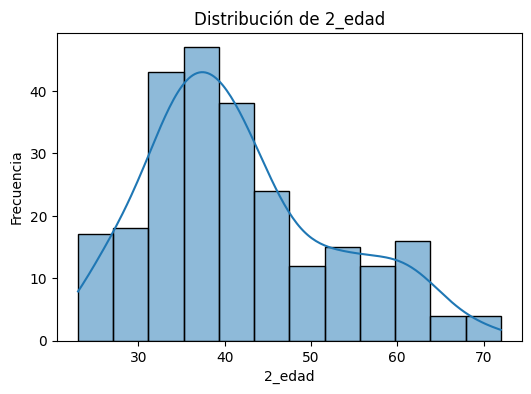

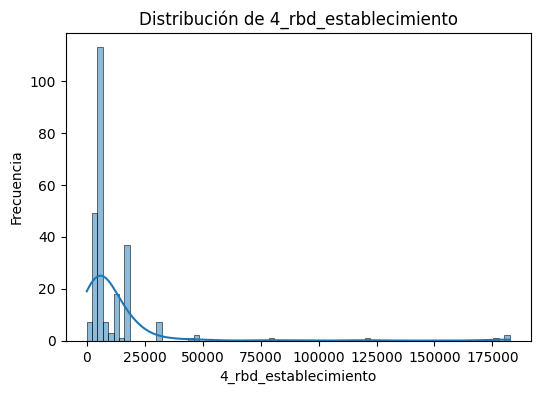

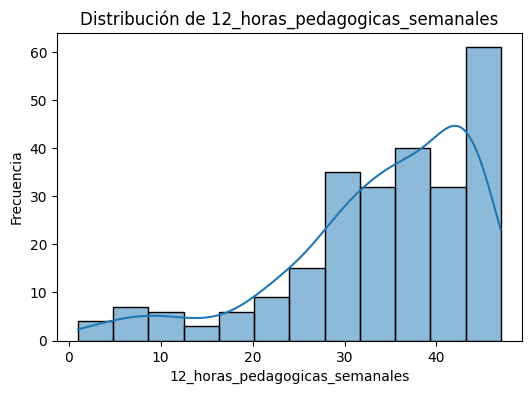

In [13]:
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

###Gráficos para visualizar la distribución de cada variable categórica individualmente.

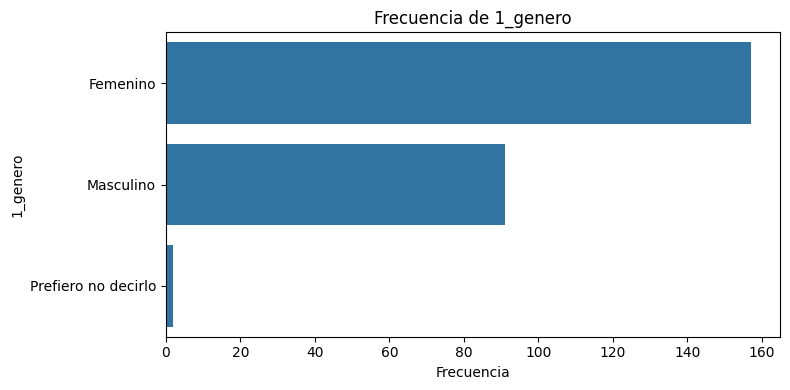

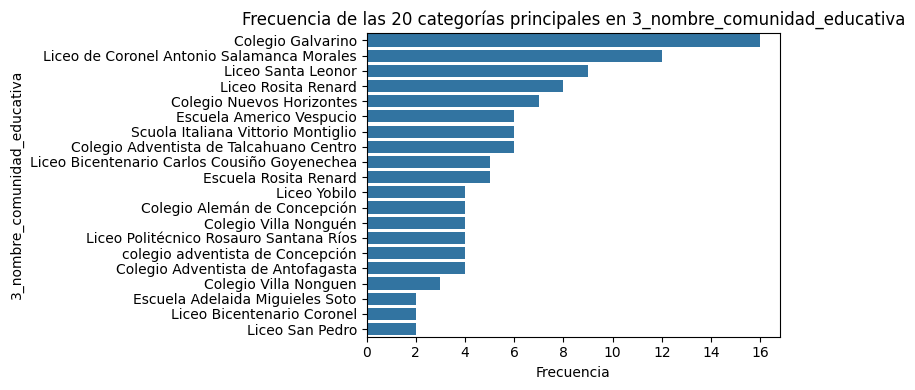

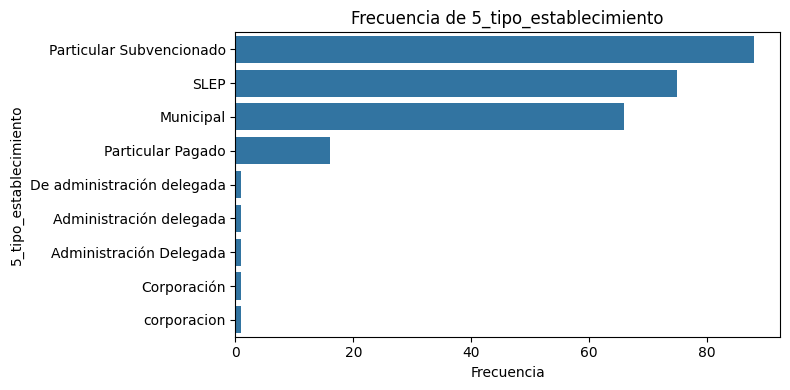

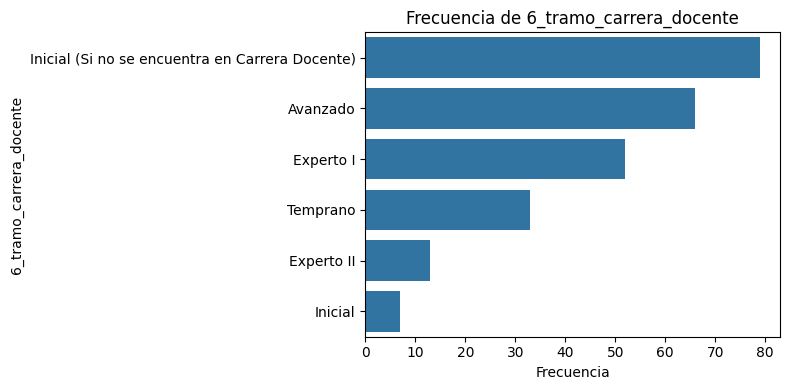

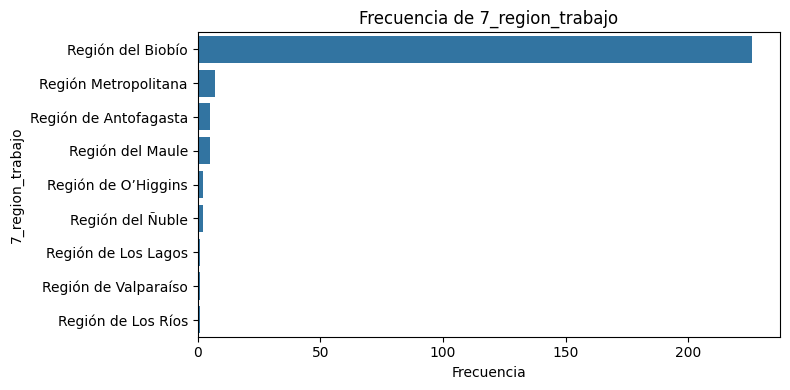

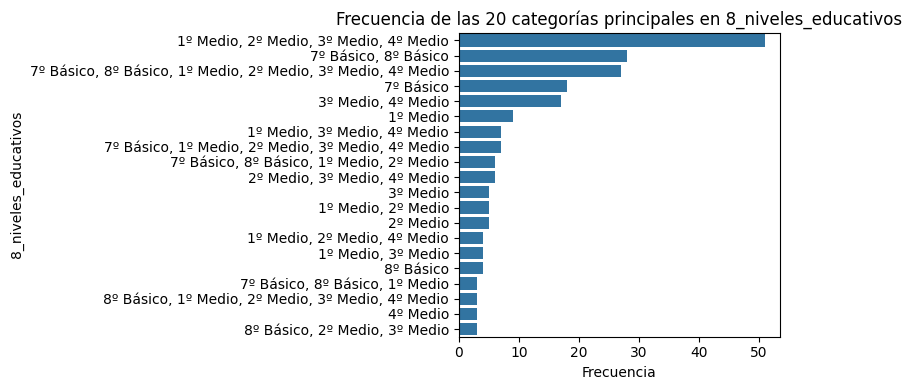

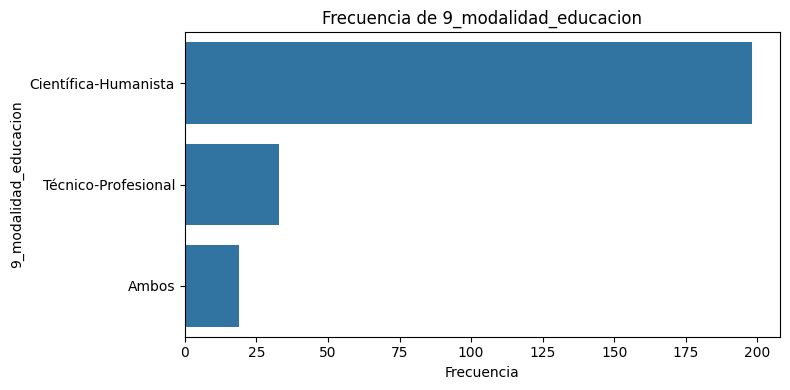

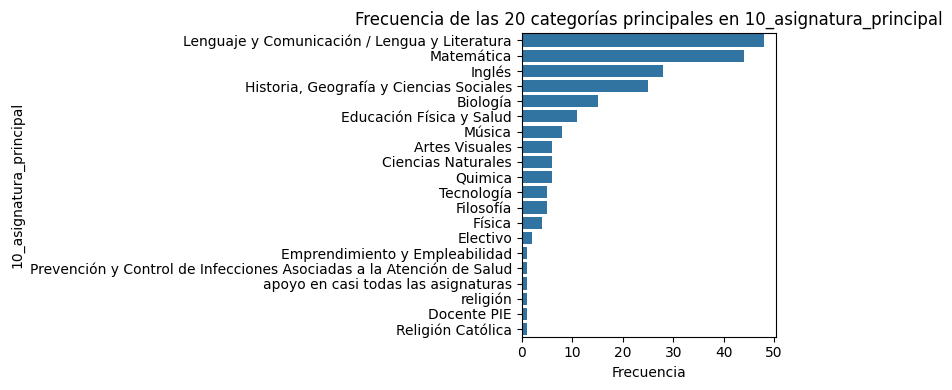

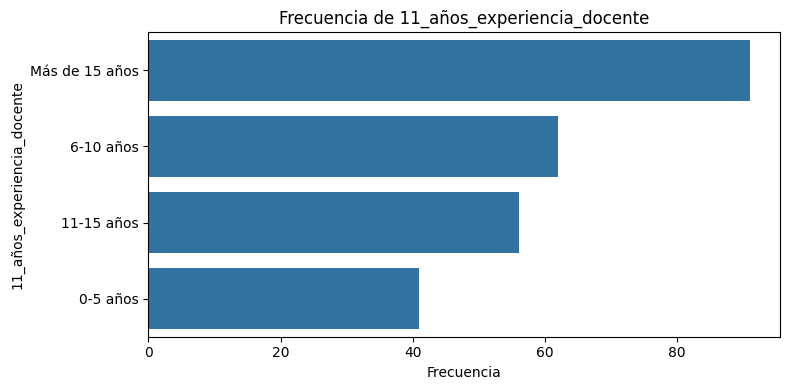

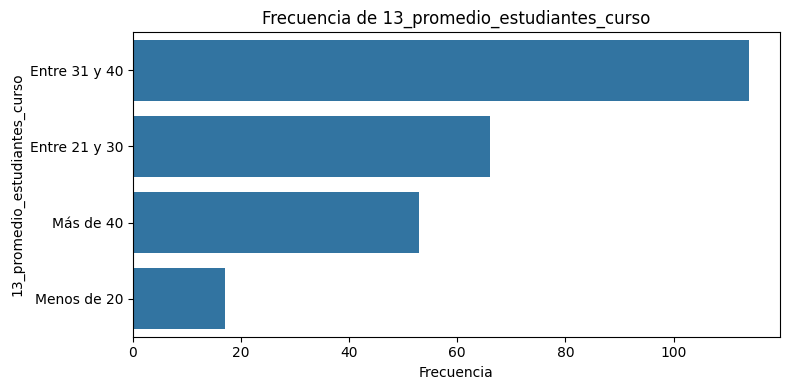

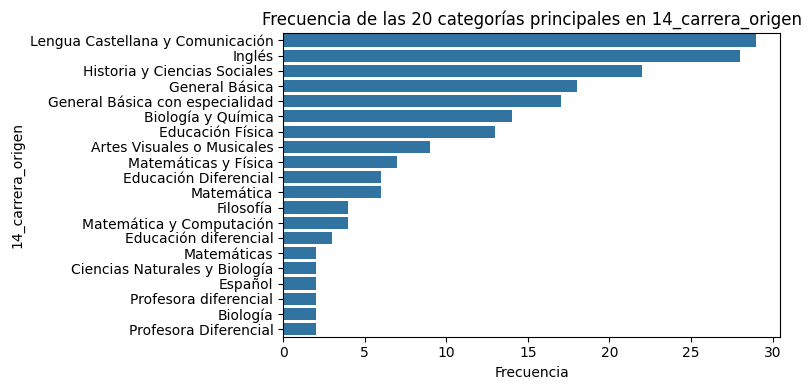

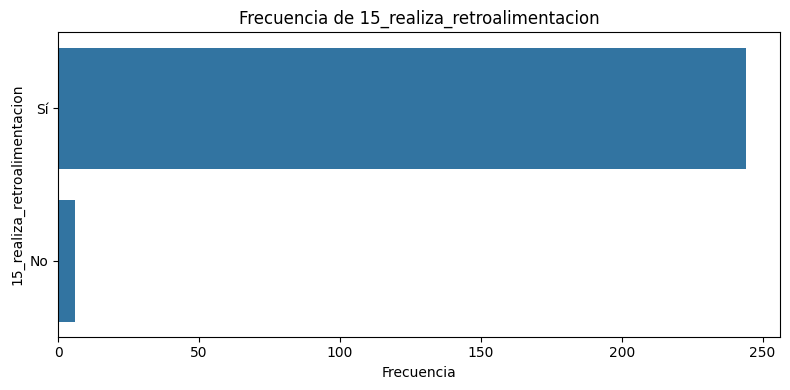

In [14]:
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        if df[col].nunique() > 20:
            top_categories = df[col].value_counts().nlargest(20).index
            sns.countplot(data=df[df[col].isin(top_categories)], y=col, order=top_categories)
            plt.title(f'Frecuencia de las 20 categorías principales en {col}')
        else:
            sns.countplot(data=df, y=col, order=df[col].value_counts().index)
            plt.title(f'Frecuencia de {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

###Gráficos para visualizar la distribución de cada variable categórica individualmente.

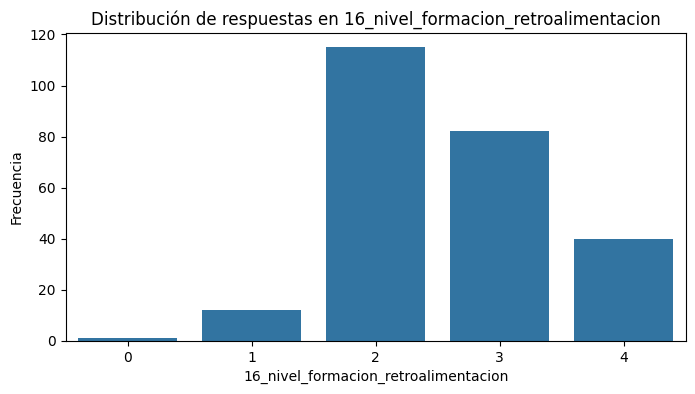

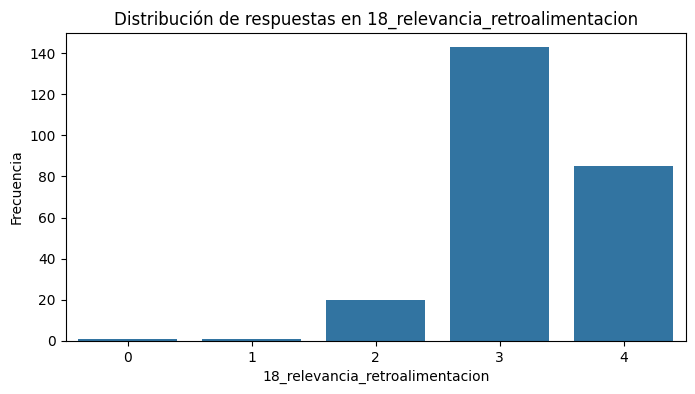

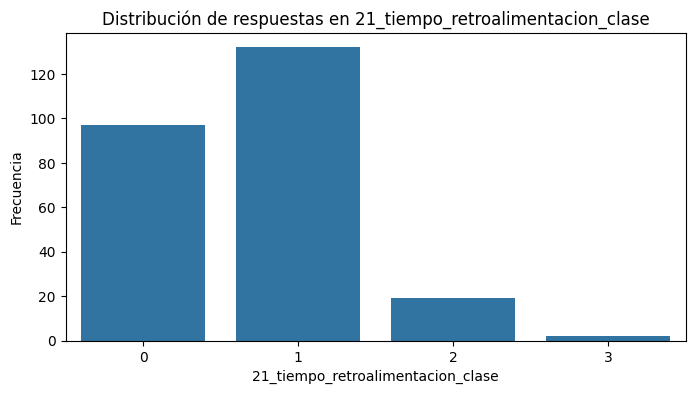

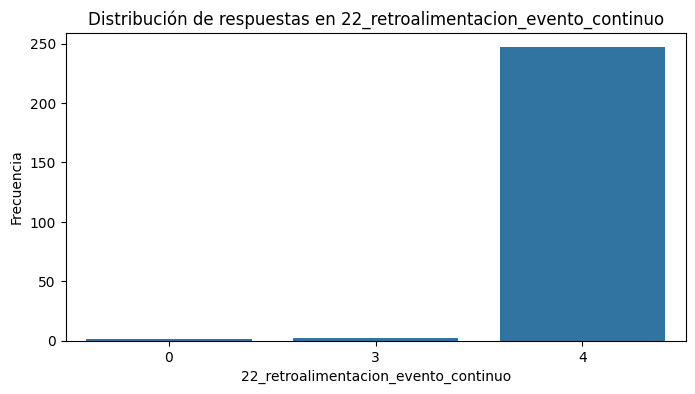

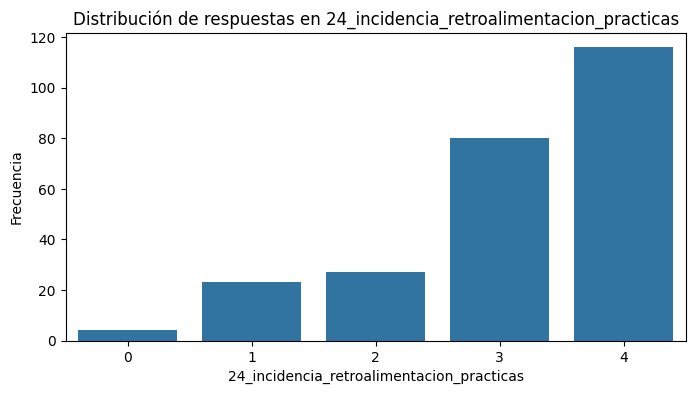

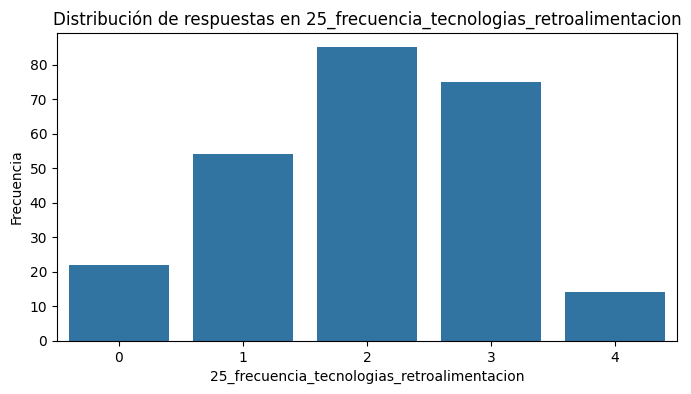

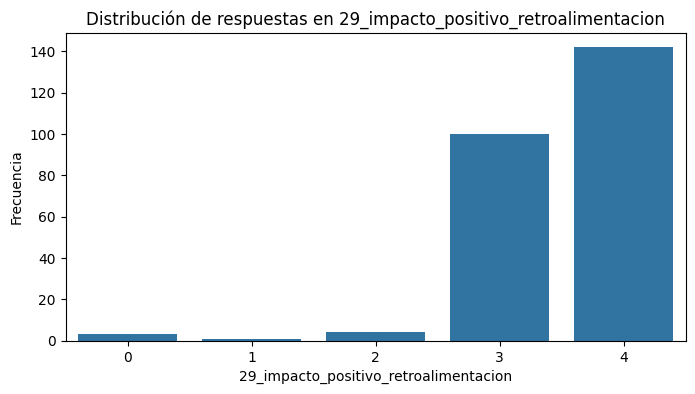

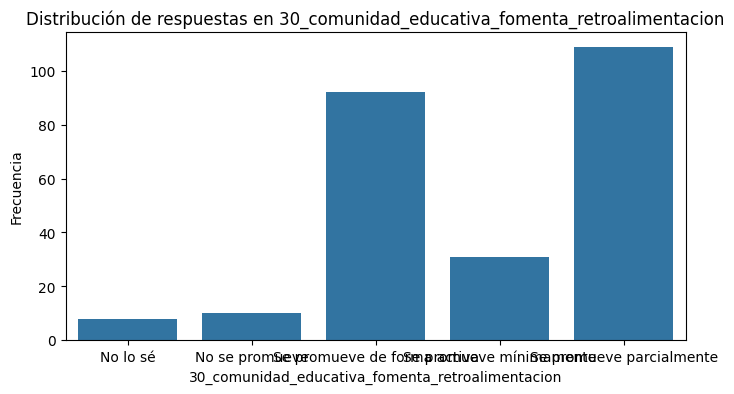

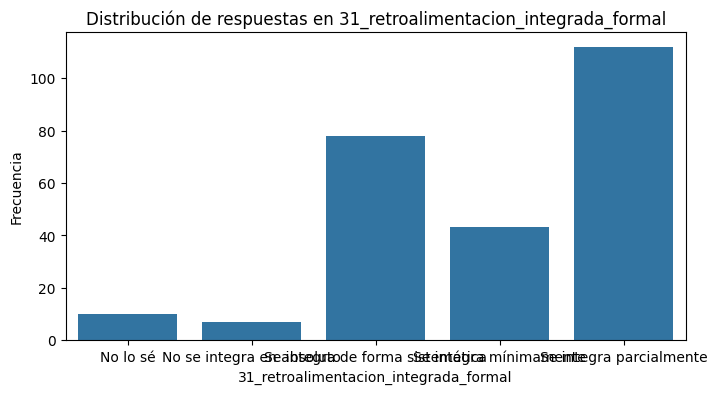

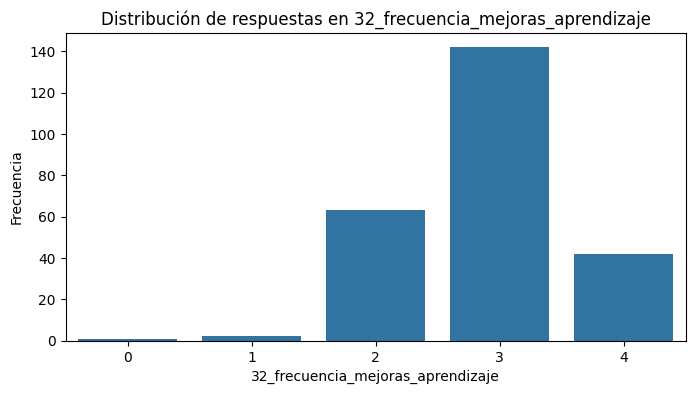

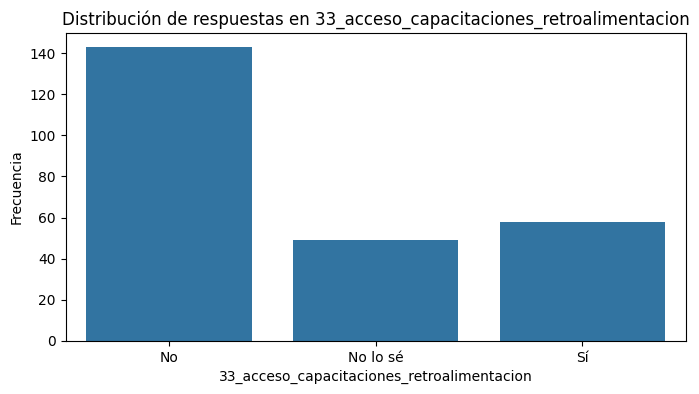

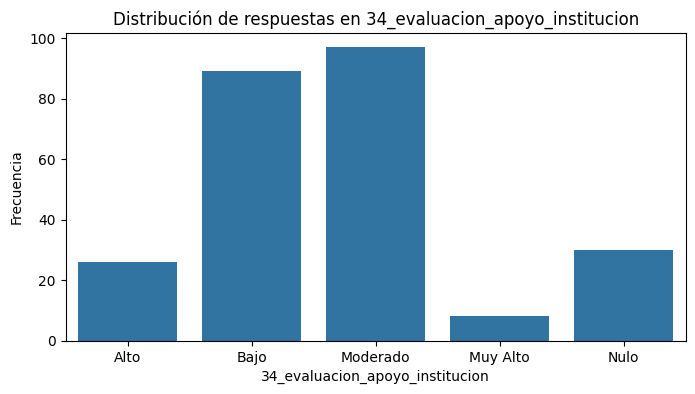

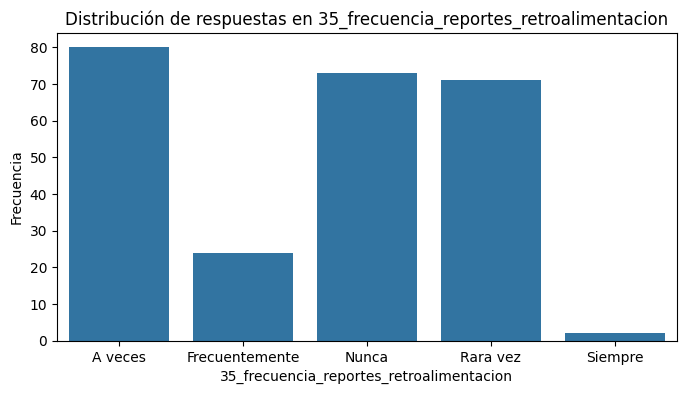

In [15]:
for col in ordinal_cols_mapped:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=sorted(df[col].dropna().unique()))
        plt.title(f'Distribución de respuestas en {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

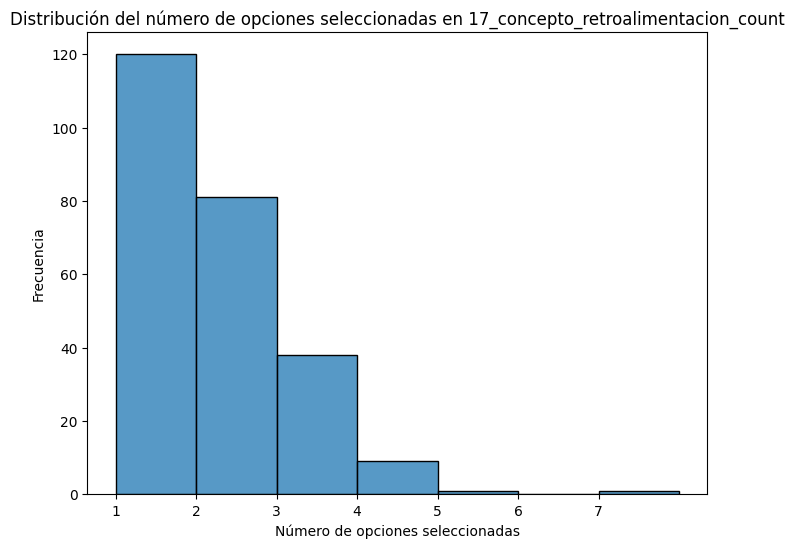

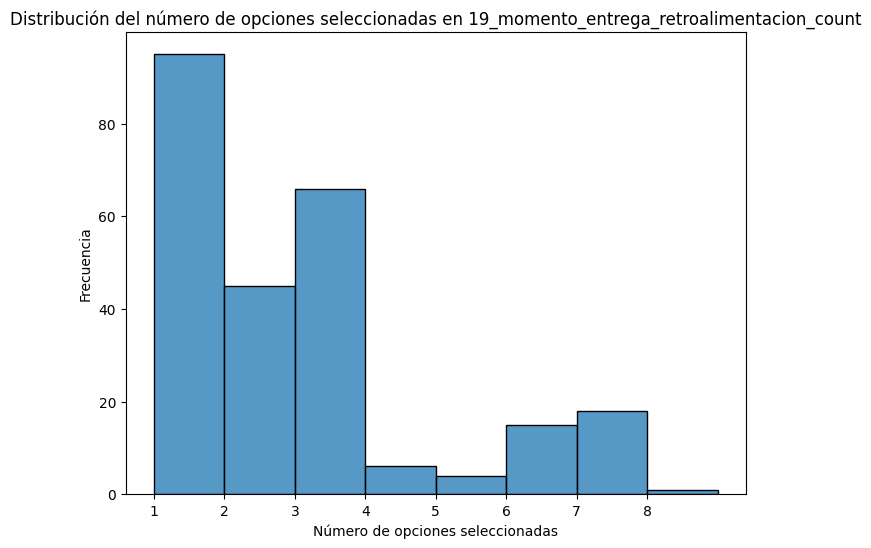

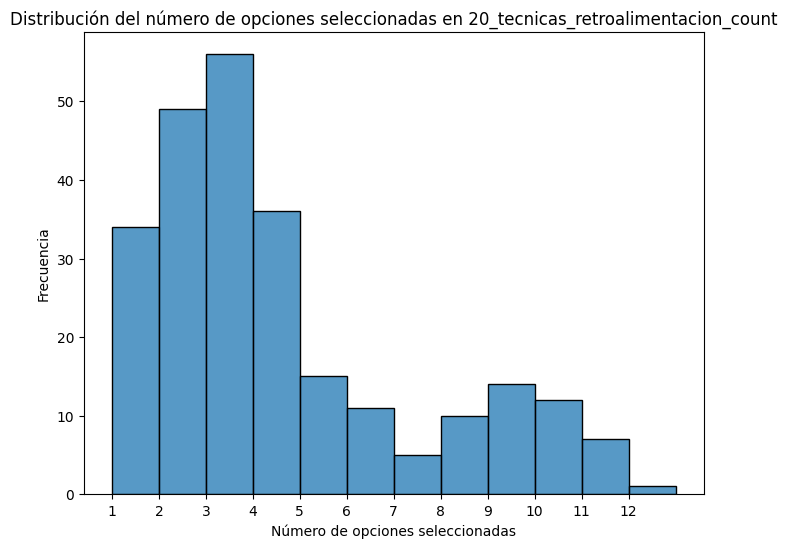

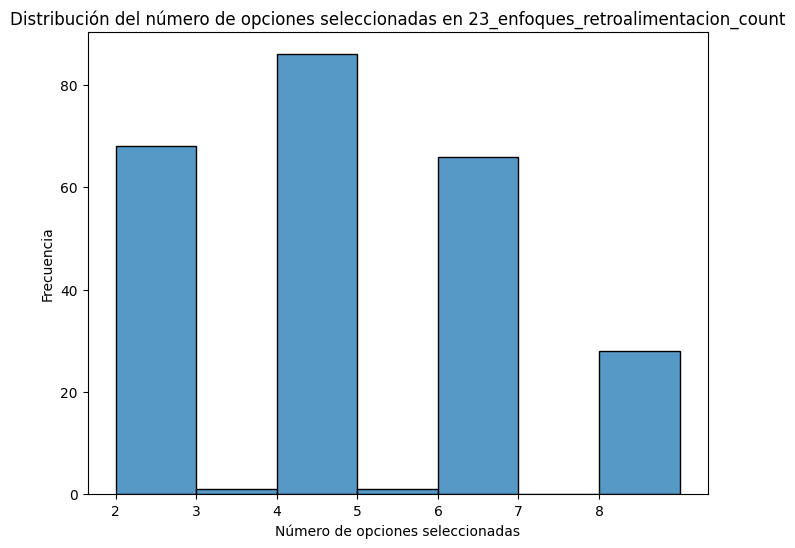

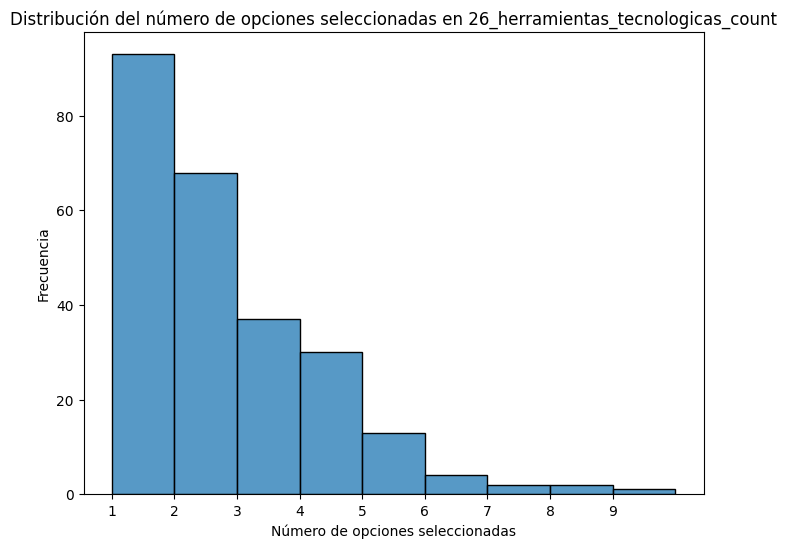

In [16]:
for col in count_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        min_val = df[col].min()
        max_val = df[col].max()
        if pd.notna(min_val) and pd.notna(max_val):
            bins_range = range(int(min_val), int(max_val) + 2)
            sns.histplot(data=df, x=col, bins=bins_range, kde=False)
            plt.xticks(range(int(min_val), int(max_val) + 1))
        else:
            sns.histplot(data=df, x=col, kde=False)
        plt.title(f'Distribución del número de opciones seleccionadas en {col}')
        plt.xlabel('Número de opciones seleccionadas')
        plt.ylabel('Frecuencia')
        plt.show()

##Definir la Variables por Dimensión

In [17]:
conocimiento_vars = [
    '16_nivel_formacion_retroalimentacion',
    '18_relevancia_retroalimentacion',
    '17_concepto_retroalimentacion_count'
]

practica_vars = [
    '21_tiempo_retroalimentacion_clase',
    '22_retroalimentacion_evento_continuo',
    '24_incidencia_retroalimentacion_practicas',
    '19_momento_entrega_retroalimentacion_count',
    '20_tecnicas_retroalimentacion_count',
    '23_enfoques_retroalimentacion_count'
    '29_impacto_positivo_retroalimentacion',
]

tecnologia_vars = [
    '25_frecuencia_tecnologias_retroalimentacion',
    '26_herramientas_tecnologicas_count'
]

institucional_vars = [
    '29_impacto_positivo_retroalimentacion',
    '30_comunidad_educativa_fomenta_retroalimentacion',
    '31_retroalimentacion_integrada_formal',
    '33_acceso_capacitaciones_retroalimentacion',
    '34_evaluacion_apoyo_institucion'
]

dimension_variables = {
    'conocimiento': conocimiento_vars,
    'practica': practica_vars,
    'tecnologia': tecnologia_vars,
#    'institucional': institucional_vars # No se considerará para el índice global
}

print("Variables definidas por dimensión:")
for dimension, variables in dimension_variables.items():
    print(f"- {dimension.capitalize()}: {variables}")

Variables definidas por dimensión:
- Conocimiento: ['16_nivel_formacion_retroalimentacion', '18_relevancia_retroalimentacion', '17_concepto_retroalimentacion_count']
- Practica: ['21_tiempo_retroalimentacion_clase', '22_retroalimentacion_evento_continuo', '24_incidencia_retroalimentacion_practicas', '19_momento_entrega_retroalimentacion_count', '20_tecnicas_retroalimentacion_count', '23_enfoques_retroalimentacion_count29_impacto_positivo_retroalimentacion']
- Tecnologia: ['25_frecuencia_tecnologias_retroalimentacion', '26_herramientas_tecnologicas_count']


## Normalizar las variables de selección múltiple contabilizadas


In [18]:
for col, counts in multiselect_counts.items():
    df[f'{col}_count'] = counts

# Muestra el encabezado del DataFrame con las nuevas columnas de conteo
display(df[[f'{col}_count' for col in multiselect_cols]].head())

,17_concepto_retroalimentacion_count,19_momento_entrega_retroalimentacion_count,20_tecnicas_retroalimentacion_count,23_enfoques_retroalimentacion_count,26_herramientas_tecnologicas_count
0,2,1,3,2,3
1,1,1,2,8,3
2,1,1,2,2,4
3,1,6,2,6,1
4,1,1,3,4,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Inicializa  MinMaxScaler
scaler = MinMaxScaler()

# Crea nuevas columnas para normalizar las variables
normalized_vars = {}
for dimension, variables in dimension_variables.items():
    normalized_vars[dimension] = []
    for var in variables:
        if var in df.columns:
            if not df[var].isnull().all():
                # Reorganiza los datos y normaliza
                df[f'{var}_normalized'] = scaler.fit_transform(df[[var]])
                normalized_vars[dimension].append(f'{var}_normalized')
            else:
                print(f"Advertencia: La columna '{var}' de la dimensión '{dimension}' contiene solo valores nulos. No se normalizará.")
                df[f'{var}_normalized'] = np.nan
                normalized_vars[dimension].append(f'{var}_normalized')
        else:
            print(f"Advertencia: La columna '{var}' no se encontró en el DataFrame para la dimensión '{dimension}'. Se ignorará.")
            df[f'{var}_normalized'] = np.nan
            normalized_vars[dimension].append(f'{var}_normalized')

# Recopila todos los nombres de columnas normalizados que realmente existen en el marco de datos
all_normalized_cols = [col for sublist in normalized_vars.values() for col in sublist if col in df.columns]

if all_normalized_cols:
    print("\nPrimeras filas del DataFrame con variables normalizadas (rango 0-1):")
    display(df[all_normalized_cols].head())

    print("\nEstadísticas descriptivas de las variables normalizadas:")
    display(df[all_normalized_cols].describe())
else:
    print("\nNo se crearon columnas normalizadas, ya sea porque no se encontraron las variables originales o porque todas contenían solo valores nulos.")

Advertencia: La columna '23_enfoques_retroalimentacion_count29_impacto_positivo_retroalimentacion' no se encontró en el DataFrame para la dimensión 'practica'. Se ignorará.

Primeras filas del DataFrame con variables normalizadas (rango 0-1):


,16_nivel_formacion_retroalimentacion_normalized,18_relevancia_retroalimentacion_normalized,17_concepto_retroalimentacion_count_normalized,21_tiempo_retroalimentacion_clase_normalized,22_retroalimentacion_evento_continuo_normalized,24_incidencia_retroalimentacion_practicas_normalized,19_momento_entrega_retroalimentacion_count_normalized,20_tecnicas_retroalimentacion_count_normalized,23_enfoques_retroalimentacion_count29_impacto_positivo_retroalimentacion_normalized,25_frecuencia_tecnologias_retroalimentacion_normalized,26_herramientas_tecnologicas_count_normalized
0,1.0,0.75,0.166667,0.333333,1.0,1.00,0.000000,0.181818,NaN,0.25,0.250
1,0.5,0.50,0.000000,0.333333,1.0,0.75,0.000000,0.090909,NaN,0.25,0.250
2,0.5,0.75,0.000000,0.333333,1.0,0.75,0.000000,0.090909,NaN,0.75,0.375
3,1.0,1.00,0.000000,0.000000,1.0,0.75,0.714286,0.090909,NaN,0.00,0.000
4,0.5,0.25,0.000000,0.333333,1.0,0.50,0.000000,0.181818,NaN,0.25,0.000



Estadísticas descriptivas de las variables normalizadas:


,16_nivel_formacion_retroalimentacion_normalized,18_relevancia_retroalimentacion_normalized,17_concepto_retroalimentacion_count_normalized,21_tiempo_retroalimentacion_clase_normalized,22_retroalimentacion_evento_continuo_normalized,24_incidencia_retroalimentacion_practicas_normalized,19_momento_entrega_retroalimentacion_count_normalized,20_tecnicas_retroalimentacion_count_normalized,23_enfoques_retroalimentacion_count29_impacto_positivo_retroalimentacion_normalized,25_frecuencia_tecnologias_retroalimentacion_normalized,26_herramientas_tecnologicas_count_normalized
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,0.0,250.000000,250.000000
mean,0.648000,0.810000,0.129333,0.234667,0.994000,0.781000,0.229143,0.285455,NaN,0.505000,0.169000
std,0.206802,0.161258,0.155035,0.213444,0.066947,0.258954,0.264842,0.258038,NaN,0.261723,0.189294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,0.500000,0.750000,0.000000,0.000000,1.000000,0.750000,0.000000,0.090909,NaN,0.250000,0.000000
50%,0.500000,0.750000,0.166667,0.333333,1.000000,0.750000,0.142857,0.181818,NaN,0.500000,0.125000
75%,0.750000,1.000000,0.166667,0.333333,1.000000,1.000000,0.285714,0.363636,NaN,0.750000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000


## Calcular los índices por dimensión y el índice global

Calcular el índice de apropiación para cada una de las cuatro dimensiones y un índice global combinando los sub-índices.

In [20]:
# Calcula subíndices para cada dimensión promediando las variables normalizadas
sub_indices = {}
sub_index_cols = []

for dimension, variables in dimension_variables.items():
    # Filtrar las columnas normalizadas que realmente existen y no son completamente NaN
    normalized_cols_for_dimension = [
        f'{var}_normalized' for var in variables
        if f'{var}_normalized' in df.columns and not df[f'{var}_normalized'].isnull().all()
    ]

    if normalized_cols_for_dimension:
        # Calcula la media de las columnas normalizadas para la dimensión
        df[f'indice_{dimension}'] = df[normalized_cols_for_dimension].mean(axis=1)
        sub_index_cols.append(f'indice_{dimension}')
        sub_indices[dimension] = f'indice_{dimension}'
    else:
        print(f"No se encontraron columnas normalizadas válidas (no todas NaN) para '{dimension}'. El subíndice será NaN.")
        df[f'indice_{dimension}'] = np.nan
        sub_index_cols.append(f'indice_{dimension}')
        sub_indices[dimension] = f'indice_{dimension}'


# Calcula el índice global promediando los subíndices
global_index_cols_to_average = [col for col in sub_index_cols if col in df.columns and not df[col].isnull().all()]

if global_index_cols_to_average:
    df['indice_global_retroalimentacion'] = df[global_index_cols_to_average].mean(axis=1)
else:
    print("Advertencia: No se calcularon sub-índices de dimensión válidos. No se puede calcular el índice global.")
    df['indice_global_retroalimentacion'] = np.nan

cols_to_display_indices = [col for col in sub_index_cols + ['indice_global_retroalimentacion'] if col in df.columns and not df[col].isnull().all()]

if cols_to_display_indices:
    print("\nPrimeras filas del DataFrame con los sub-índices y el índice global (ya promediados y en rango 0-1):")
    display(df[cols_to_display_indices].head())

    print("\nEstadísticas descriptivas de los sub-índices y el índice global (confirmando el rango 0-1):")
    display(df[cols_to_display_indices].describe())
else:
    print("\nNo hay sub-índices o índice global válidos para mostrar.")


Primeras filas del DataFrame con los sub-índices y el índice global (ya promediados y en rango 0-1):


,indice_conocimiento,indice_practica,indice_tecnologia,indice_global_retroalimentacion
0,0.638889,0.503030,0.2500,0.463973
1,0.333333,0.434848,0.2500,0.339394
2,0.416667,0.434848,0.5625,0.471338
3,0.666667,0.511039,0.0000,0.392569
4,0.250000,0.403030,0.1250,0.259343



Estadísticas descriptivas de los sub-índices y el índice global (confirmando el rango 0-1):


,indice_conocimiento,indice_practica,indice_tecnologia,indice_global_retroalimentacion
count,250.000000,250.000000,250.000000,250.000000
mean,0.529111,0.504853,0.337000,0.456988
std,0.113613,0.124474,0.200854,0.113142
min,0.250000,0.136364,0.000000,0.219066
25%,0.472222,0.418182,0.187500,0.369904
50%,0.500000,0.500866,0.312500,0.454449
75%,0.583333,0.588528,0.500000,0.531301
max,0.888889,0.868398,0.937500,0.738582


## Categorizar el índice global

Categorizar el índice global de apropiación de la retroalimentación docente en niveles bajo, medio y alto.

In [21]:
# Define los límites de las categorías (baja, media, alta)
# Filtrar los valores NaN de 'indice_global_retroalimentacion' para el cálculo de mínimo/máximo
valid_indices = df['indice_global_retroalimentacion'].dropna()

if not valid_indices.empty:
    min_index = valid_indices.min()
    max_index = valid_indices.max()

    # Define los contenedores
    # Agrega un pequeño valor de épsilon a max_index para asegurar que el valor máximo caiga en el último intervalo.
    bins = np.linspace(min_index, max_index + 1e-9, 4)

    # Define las etiquetas para las categorías
    labels = ['Bajo', 'Medio', 'Alto']

    # Crea una nueva columna para las categorías
    df['nivel_apropiacion_retroalimentacion'] = pd.cut(df['indice_global_retroalimentacion'], bins=bins, labels=labels, include_lowest=True)

    print("\nDistribución del Nivel de Apropiación de la Retroalimentación:")
    display(df['nivel_apropiacion_retroalimentacion'].value_counts())

    print("\nPrimeras filas del DataFrame con la nueva columna de nivel:")
    display(df[['indice_global_retroalimentacion', 'nivel_apropiacion_retroalimentacion']].head())
else:
    print("Advertencia: 'indice_global_retroalimentacion' contiene solo valores nulos. No se puede categorizar.")
    df['nivel_apropiacion_retroalimentacion'] = np.nan


Distribución del Nivel de Apropiación de la Retroalimentación:


,count
nivel_apropiacion_retroalimentacion,
Medio,121
Bajo,79
Alto,50



Primeras filas del DataFrame con la nueva columna de nivel:


,indice_global_retroalimentacion,nivel_apropiacion_retroalimentacion
0,0.463973,Medio
1,0.339394,Bajo
2,0.471338,Medio
3,0.392569,Medio
4,0.259343,Bajo


##Guarda un nuevo DataFrame con las variables normalizadas, índice y nivel de apropiación.

In [22]:
output_filename = '/content/drive/MyDrive/df_processed_normalized.csv'
df.to_csv(output_filename, index=False)
print(f"DataFrame con variables normalizadas, índices y nivel de apropiación guardado exitosamente en: {output_filename}")


DataFrame con variables normalizadas, índices y nivel de apropiación guardado exitosamente en: /content/drive/MyDrive/df_processed_normalized.csv


In [23]:
# Recargar el DataFrame que incluye todas las variables normalizadas, índices y el nivel de apropiación
df = pd.read_csv('/content/drive/MyDrive/df_processed_normalized.csv')

# Columnas de las preguntas 16 a 35 (normalizadas o conteos normalizados)
normalized_q16_to_q35 = [
    '16_nivel_formacion_retroalimentacion_normalized',
    '18_relevancia_retroalimentacion_normalized',
    '21_tiempo_retroalimentacion_clase_normalized',
    '22_retroalimentacion_evento_continuo_normalized',
    '24_incidencia_retroalimentacion_practicas_normalized',
    '25_frecuencia_tecnologias_retroalimentacion_normalized',
    '29_impacto_positivo_retroalimentacion_normalized',
#    '30_comunidad_educativa_fomenta_retroalimentacion_normalized', # No se considerará en el Indice de Apropiación de Retroalimentación
#    '31_retroalimentacion_integrada_formal_normalized', # No se considerará en el IARD
#    '33_acceso_capacitaciones_retroalimentacion_normalized', # No se considerará en el IARD
#    '34_evaluacion_apoyo_institucion_normalized', # No se considerará en el IARD
#    '35_frecuencia_reportes_retroalimentacion_normalized', # No se considerará en el IARD
    '17_concepto_retroalimentacion_count_normalized',
    '19_momento_entrega_retroalimentacion_count_normalized',
    '20_tecnicas_retroalimentacion_count_normalized',
    '23_enfoques_retroalimentacion_count_normalized',
    '26_herramientas_tecnologicas_count_normalized'
]

# Columna del nivel de apropiación
nivel_apropiacion_col = ['nivel_apropiacion_retroalimentacion']

# Unir todas las listas de columnas
all_desired_cols = normalized_q16_to_q35 + nivel_apropiacion_col

# Filtrar las columnas que realmente existen en el DataFrame recargado para evitar KeyErrors
existing_desired_cols = [col for col in all_desired_cols if col in df.columns]

# Crear el nuevo DataFrame
df_final_output = df[existing_desired_cols].copy()

# Mostrar las primeras filas del nuevo DataFrame
print("\nPrimeras filas del nuevo DataFrame con las columnas solicitadas:")
display(df_final_output.head())

# Guardar el nuevo DataFrame en Google Drive
output_filename_final = '/content/drive/MyDrive/df_analisis_final.csv'
df_final_output.to_csv(output_filename_final, index=False)
print(f"\nNuevo DataFrame guardado exitosamente en: {output_filename_final}")


Primeras filas del nuevo DataFrame con las columnas solicitadas:


,16_nivel_formacion_retroalimentacion_normalized,18_relevancia_retroalimentacion_normalized,21_tiempo_retroalimentacion_clase_normalized,22_retroalimentacion_evento_continuo_normalized,24_incidencia_retroalimentacion_practicas_normalized,25_frecuencia_tecnologias_retroalimentacion_normalized,17_concepto_retroalimentacion_count_normalized,19_momento_entrega_retroalimentacion_count_normalized,20_tecnicas_retroalimentacion_count_normalized,26_herramientas_tecnologicas_count_normalized,nivel_apropiacion_retroalimentacion
0,1.0,0.75,0.333333,1.0,1.00,0.25,0.166667,0.000000,0.181818,0.250,Medio
1,0.5,0.50,0.333333,1.0,0.75,0.25,0.000000,0.000000,0.090909,0.250,Bajo
2,0.5,0.75,0.333333,1.0,0.75,0.75,0.000000,0.000000,0.090909,0.375,Medio
3,1.0,1.00,0.000000,1.0,0.75,0.00,0.000000,0.714286,0.090909,0.000,Medio
4,0.5,0.25,0.333333,1.0,0.50,0.25,0.000000,0.000000,0.181818,0.000,Bajo



Nuevo DataFrame guardado exitosamente en: /content/drive/MyDrive/df_analisis_final.csv


# Entrenar con el mejor modelo

Se seleccionan las variables relevantes (características del docente y variables relacionadas con la retroalimentación).

In [24]:
# Cargar el dataset proporcionado
df = pd.read_csv('/content/drive/MyDrive/df_analisis_final.csv')
print("Conjunto de datos cargado correctamente. Shape:", df.shape)

Conjunto de datos cargado correctamente. Shape: (250, 11)


Cargando datos...
Clases detectadas: {0: 'Alto', 1: 'Bajo', 2: 'Medio'}
Entrenamiento: 175 muestras | Prueba: 75 muestras

Entrenando modelos con GridSearchCV...
------------------------------------------------------------
Random Forest...
   CV F1-macro (mean±std): 0.8268 ± 0.0504
   Test F1-macro: 0.8103 | Acc: 0.8133 | AUC: 0.9476
XGBoost...
   CV F1-macro (mean±std): 0.8313 ± 0.0555
   Test F1-macro: 0.8879 | Acc: 0.8933 | AUC: 0.9664
Regresión Logística...
   CV F1-macro (mean±std): 0.9495 ± 0.0669
   Test F1-macro: 0.9041 | Acc: 0.9067 | AUC: 0.9941
SVM...
   CV F1-macro (mean±std): 0.8703 ± 0.0625
   Test F1-macro: 0.8102 | Acc: 0.8133 | AUC: 0.9689
Red Neuronal (MLP)...
   CV F1-macro (mean±std): 0.9174 ± 0.0314
   Test F1-macro: 0.8430 | Acc: 0.8533 | AUC: 0.9806

RESULTADOS FINALES - MÉTRICAS CV y TEST
             Modelo  F1-macro CV (mean)  F1-macro CV (std)  Accuracy test  Precision test (macro)  Recall test (macro)  F1-score test (macro)  AUC-ROC test (OvR)               

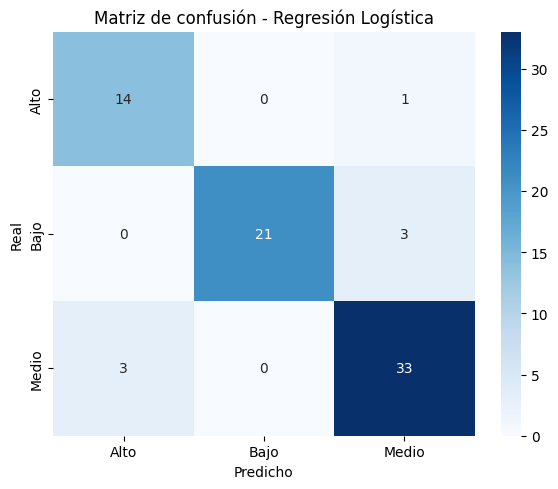


Calculando importancia de características (Regresión Logística)...


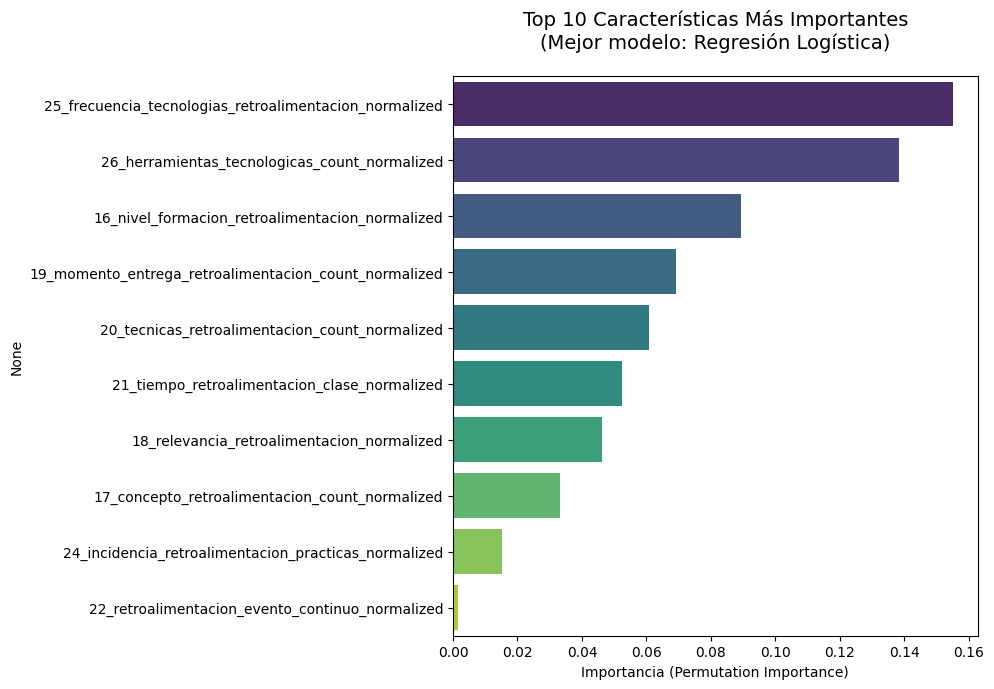


Modelo final guardado: modelo_retroalimentacion.pkl
Gráficos guardados: matriz_confusion_mejor_modelo.png, importancia_caracteristicas_mejor_modelo.png


In [25]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# ===================== 1. CARGA Y PREPROCESAMIENTO =====================
print("Cargando datos...")
df = pd.read_csv('/content/drive/MyDrive/df_analisis_final.csv')
df = df.rename(columns={'nivel_apropiacion_retroalimentacion': 'nivel'})

X = df.drop('nivel', axis=1)
y = df['nivel']

# Codificar clases
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
print(f"Clases detectadas: {dict(zip(range(len(class_names)), class_names))}")

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Entrenamiento: {X_train.shape[0]} muestras | Prueba: {X_test.shape[0]} muestras\n")

# ===================== 2. MODELOS Y GRIDSEARCH =====================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Random Forest': (
        RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
        {   'n_estimators': [300, 500],
            'max_depth': [None, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    ),
    'XGBoost': (
        XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False),
        {   'n_estimators': [300, 500],
            'max_depth': [4, 6, 10],
            'learning_rate': [0.05, 0.1],
            'subsample': [0.8, 1.0]
        }
    ),
    'Regresión Logística': (
        LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', multi_class='auto'),
        {'C': [0.1, 1, 10],
         'solver': ['lbfgs']
        }
    ),
    'SVM': (
        SVC(probability=True, random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'kernel': ['rbf', 'poly'],
         'gamma': ['scale', 'auto']
        }
    ),
    'Red Neuronal (MLP)': (
        MLPClassifier(random_state=42, max_iter=1000),
        {   'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
            'alpha': [0.0001, 0.001],
            'learning_rate': ['adaptive']
        }
    )
}

# ===================== 3. ENTRENAMIENTO Y EVALUACIÓN =====================
results = []
best_model = None
best_name = ""
best_f1_macro_test = -np.inf

print("Entrenando modelos con GridSearchCV...\n" + "-"*60)

for name, (model, params) in models.items():
    print(f"{name}...")
    grid = GridSearchCV(
        model,
        params,
        cv=cv,
        scoring='f1_macro',
        n_jobs=-1,
        return_train_score=True
    )
    grid.fit(X_train, y_train)

    # Predicción en test
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)

    # Métricas en test
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    # Métrica promedio en CV (F1-macro)
    mean_f1_cv = grid.cv_results_['mean_test_score'][grid.best_index_]
    std_f1_cv = grid.cv_results_['std_test_score'][grid.best_index_]

    results.append({
        'Modelo': name,
        'F1-macro CV (mean)': mean_f1_cv,
        'F1-macro CV (std)': std_f1_cv,
        'Accuracy test': acc,
        'Precision test (macro)': prec,
        'Recall test (macro)': rec,
        'F1-score test (macro)': f1,
        'AUC-ROC test (OvR)': auc,
        'Mejor Config': grid.best_params_
    })

    print(f"   CV F1-macro (mean±std): {mean_f1_cv:.4f} ± {std_f1_cv:.4f}")
    print(f"   Test F1-macro: {f1:.4f} | Acc: {acc:.4f} | AUC: {auc:.4f}")

    # Selección de mejor modelo por F1-macro en TEST
    if f1 > best_f1_macro_test:
        best_f1_macro_test = f1
        best_model = grid.best_estimator_
        best_name = name

# ===================== 4. RESULTADOS FINALES =====================
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

# Orden principal: F1-macro TEST, secundario: F1-macro CV
results_df = results_df.sort_values(
    ['F1-score test (macro)', 'F1-macro CV (mean)'],
    ascending=False
)

print("\n" + "="*80)
print("RESULTADOS FINALES - MÉTRICAS CV y TEST")
print("="*80)
print(results_df.to_string(index=False))
print(f"\nMEJOR MODELO (según F1-macro en test): {best_name} (F1-macro test = {best_f1_macro_test:.4f})")

# ===================== 5. MATRIZ DE CONFUSIÓN Y REPORTE =====================
y_pred_best = best_model.predict(X_test)
print(f"\nReporte de clasificación ({best_name}):")
print(classification_report(y_test, y_pred_best, target_names=class_names))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title(f'Matriz de confusión - {best_name}')
plt.tight_layout()
plt.savefig("matriz_confusion_mejor_modelo.png", dpi=300, bbox_inches='tight')
plt.show()

# ===================== 6. IMPORTANCIA DE CARACTERÍSTICAS (Permutation) =====================
print(f"\nCalculando importancia de características ({best_name})...")

perm = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=30,
    random_state=42,
    scoring='f1_macro'
)
sorted_idx = perm.importances_mean.argsort()[::-1][:10]

plt.figure(figsize=(10, 7))
sns.barplot(
    x=perm.importances_mean[sorted_idx],
    y=X.columns[sorted_idx],
    palette="viridis"
)
plt.title(f"Top 10 Características Más Importantes\n(Mejor modelo: {best_name})", fontsize=14, pad=20)
plt.xlabel("Importancia (Permutation Importance)")
plt.tight_layout()
plt.savefig("importancia_caracteristicas_mejor_modelo.png", dpi=300, bbox_inches='tight')
plt.show()

# ===================== 7. GUARDAR MEJOR MODELO =====================
selected_features = X.columns[sorted_idx[:9]].tolist()
feature_indices = sorted_idx[:9].tolist()

final_data = {
    'model': best_model,
    'scaler': scaler,
    'le': le,
    'selected_features': selected_features,
    'feature_indices': feature_indices,
    'all_feature_names': X.columns.tolist(),
    'best_model_name': best_name,
    'metrics_table': results_df.to_dict('records'),
    'classification_report': classification_report(
        y_test, y_pred_best, target_names=class_names, output_dict=True
    )
}

with open('modelo_retroalimentacion.pkl', 'wb') as f:
    pickle.dump(final_data, f)

print("\nModelo final guardado: modelo_retroalimentacion.pkl")
print("Gráficos guardados: matriz_confusion_mejor_modelo.png, importancia_caracteristicas_mejor_modelo.png")
